In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [4]:
data = data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_flower = [4.5, 1]

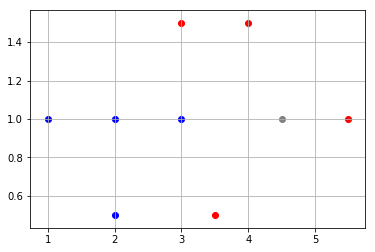

In [6]:
def vis_data():
    plt.grid()
    
    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c= 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)
    
    plt.scatter(mystery_flower[0], mystery_flower[1], c ='gray')
vis_data()

In [8]:
def sigmoid(x):
    return 1/ (1 + np.exp(- x))

def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))

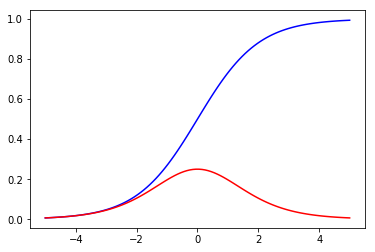

In [10]:
T = np.linspace(-5, 5, 100)
Y = sigmoid(T)
plt.plot(T, sigmoid(T), c = 'b')
plt.plot(T, sigmoid_p(T), c = 'r')

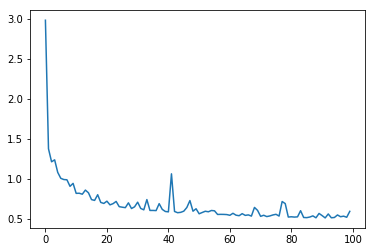

In [56]:
def train():
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 10000
    learning_rate = 0.1
    costs = []
    
    for i in range(iterations):
        ri = np.random.randint(len(data))
        point = data[ri]
        
        z = w1 * point[0] + w2 * point[1] + b
        pred = sigmoid(z)
        
        target = point[2]
    
        cost = np.square(pred - target)
        
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(pred - p[2])
            costs.append(c)
        
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_b = dcost_dz * dz_db
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_b
        
    return costs, w1, w2, b

costs, w1, w2, b = train()

fig = plt.plot(costs)
        
        
        

In [48]:
z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print(pred)
print("close to 0 -> blue, close to 1 -> red")

0.981696615824571
close to 0 -> blue, close to 1 -> red


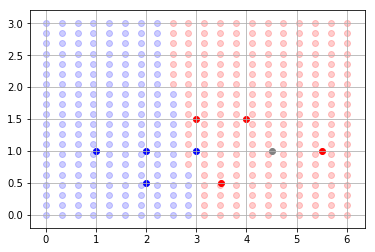

In [57]:
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)

vis_data()